In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### 21. Histogram Normalization

**Detail: Implement histogram normalization**

It can be seen that the histogram has a bias. For example, if there are many pixels close to 0, the image will be dark overall, and if there are many pixels close to 255, the image will be bright. The local bias of the histogram is expressed as a **narrow dynamic range**. Therefore, processing such as normalization and flattening of the histogram is necessary to make the image easy to be viewed by the human eye.

This histogram normalization is called **gray-scale transformation**, and can be realized by the following equation when converting an image having pixel values of [c,d] into a range of [a,b]. This time, *imori_dark.jpg* is converted to the range of [0,255] respectively.

```bash
xout = {
          a                                     (xin < c)
         (b-a)/(d-c) * (xin-c) + a              (c <= xin <= d)
          b                                     (d < xin)
       }
```

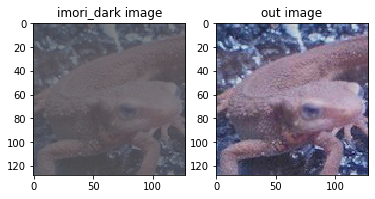

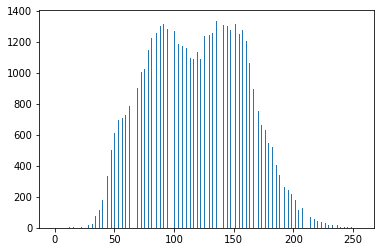

In [8]:
img = cv2.imread("Dataset/others/imori_dark.jpg")
H, W, C = img.shape

# Trans [0, 255]
a, b = 0., 255.

vmin = img.min()
vmax = img.max()

out = img.copy()
out[out < a] = a
out[out > b] = b
out = (b - a) / (vmax - vmin) * (out - vmin) + a
out = out.astype(np.uint8)

# Display histogram
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('imori_dark image')
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(out,cv2.COLOR_BGR2RGB))
plt.title('out image')
plt.show()
plt.hist(out.ravel(), bins=255, rwidth=0.8, range=(0,255))
plt.show()

### 22. Histogram Operation

This is not a change in the dynamic range of the histogram but an operation to change the histogram to be flat. 

To achieve this, we can use the following equation to transforom the histogram of $m$ mean value with $s$ standard deviation to mean value of $m_0$ with standard deviation of $s_0$ histogram.
 $$ x_{out}=\frac{s_0}{s}\cdot (x_{in}-m)+m_0 $$
```bash
Z-Score: (X-mean)/std
```

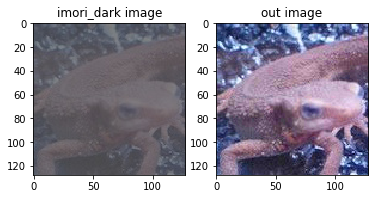

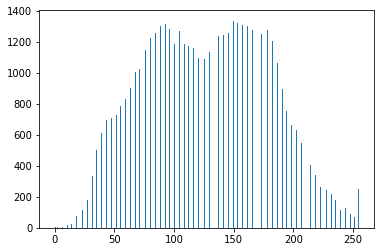

In [9]:
img = cv2.imread("Dataset/others/imori_dark.jpg")
H, W, C = img.shape

m0 = 128
s0 = 52

m = np.mean(img)
s = np.std(img)

out = img.copy()
out = s0/s *(out-m)+m0
out[out < 0] = 0
out[out > 255] = 255

out = out.astype(np.uint8)

# Display histogram
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('imori_dark image')
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(out,cv2.COLOR_BGR2RGB))
plt.title('out image')
plt.show()
plt.hist(out.ravel(), bins=255, rwidth=0.8, range=(0,255))
plt.show()

### 23. Histogram Equalization

**Detail: Implement histogram flattening**. 

Histogram flattening is an operation for changing the histogram to be **flat**, and is an operation for balancing the histogram values **without requiring the above-mentioned average value or standard deviation**.

This defined by the following equation.

- S: total number of pixel values
- Zmax: maximum value of pixel values
- h(z): frequency of density z

$$ Z^{'} = Zmax / S * Sum\{i=0:z\} h(z) $$

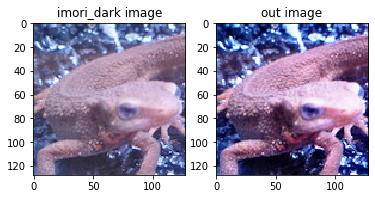

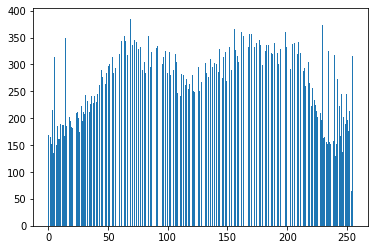

In [11]:
img = cv2.imread("Dataset/others/imori.jpg")
H, W, C = img.shape

# Histogram flattening
S = H * W * C *1

out = img.copy().astype(np.float)
sum_h = 0
z_max = 255

for i in range(1,255):
    ind = np.where(img==i)
    sum_h += len(img[ind])
    z_prime = z_max/S * sum_h
    out[ind] = z_prime

out = out.astype(np.uint8)

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('imori_dark image')
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(out,cv2.COLOR_BGR2RGB))
plt.title('out image')
plt.show()
# Display histogram
plt.hist(out.ravel(), bins=255, rwidth=0.8, range=(0,255))
plt.show()

### 24. Gamma Correction

**Detail: Perform gamma correction (c = 1, g = 2.2) on imori_gamma.jpg**

Gamma correction is correction when pixel values are converted non-linearly via a device such as a camera. When an image is displayed as it is on a screen, it becomes dark. **Therefore, it is an object of gamma correction to perform image display excluding the characteristics of the display by increasing the values of RGB in advance.**

The non-linear transformation is shown in the following equation.

- x: is normalized to [0, 1].
- c: constant
- g: gamma characteristic (usually 2.2)

> x' = c * Iin ^ g

Therefore, gamma correction is performed by the following equation.
> Iout = (1/c * Iin) ^ (1/g)

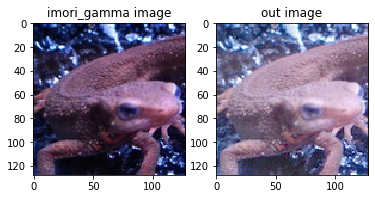

In [12]:
img = cv2.imread("Dataset/others/imori_gamma.jpg")

# Gamma correction
c = 1.
g = 2.2

out = img.copy().astype(np.float)
out /= 255
out = (1/c*out) ** (1/g)

out *= 255
out = out.astype(np.uint8)

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('imori_gamma image')
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(out,cv2.COLOR_BGR2RGB))
plt.title('out image')
plt.show()

### 25. Nearest Neighbor Interpolation

**Detail: Enlarge the image 1.5 times by nearest neighbor interpolation.**

Nearest neighbor interpolation is a method of using the nearest pixel as it is when enlarging an image. Simple and fast processing speed, but the image quality is significantly degraded.

Interpolated by the following equation.

- I': the image after enlargement,
- I : the image before enlargement
- a : the magnification
- []: rounding off
![NNI](Dataset/others/25_nni_fig.png)

> I'(x,y) = I([x/a],[y/a])

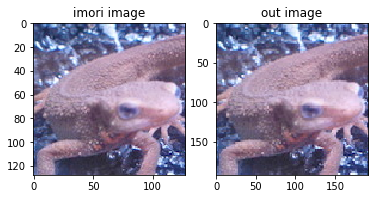

(128, 128, 3)
(192, 192, 3)


In [54]:
img = cv2.imread("Dataset/others/imori.jpg")
H, W, C = img.shape

# Nearest Neighbor
a = 1.5
aH = int(a*H)
aW = int(a*W)

y = np.arange(aH).repeat(aW).reshape(aW, -1)
x = np.tile(np.arange(aW), (aH, 1))
y = np.round(y/a).astype(np.int)
x = np.round(x/a).astype(np.int)

out = img[y,x]
out = out.astype(np.uint8)

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('imori image')
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(out,cv2.COLOR_BGR2RGB))
plt.title('out image')
plt.show()
print(img.shape)
print(out.shape)

### 26. Bi-linear Interpolation

**Detail: Enlarge the image 1.5 times with Bi-linear interpolation.**

Bi-linear interpolation is a method of complementing by weighting the four surrounding pixels according to the distance.

Although the processing time is increased as the amount of calculation is large, deterioration of the image quality can be supressed.

- 1. The coordinates (x', y') of the magnified image are divided by the magnification ratio a to obtain floor (x'/a,y'/a).
- 2. Four pixels around (x'/a,y'/a) of the original image, I(x,y), I(x+1,y), I(x,y+1), I(x+1,y+1)
    
> I(x, y)     I(x+1, y)
>      * (x'/a, y'/a)
> I(x, y+1)   I(x+1, y+1)

- 3. The distance **d** between each pixel and (x'/a, y'/a) is determined and weighted. **w = d / Sum d**
- 4. The pixel (x', y') of the enlarged image is determined by the following equation. dx = x'/a-x, dy = y'/a-y
    
> I'(x',y') = (1-dx)(1-dy)I(x,y) + dx(1-dy)I(x+1,y) + (1-dx)dyI(x, y+1) + dxdyI(x+1, y+1)
